# Лабораторна робота номер 6
### ФБ-24 Довгаль Анна

#### Завдання 1
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

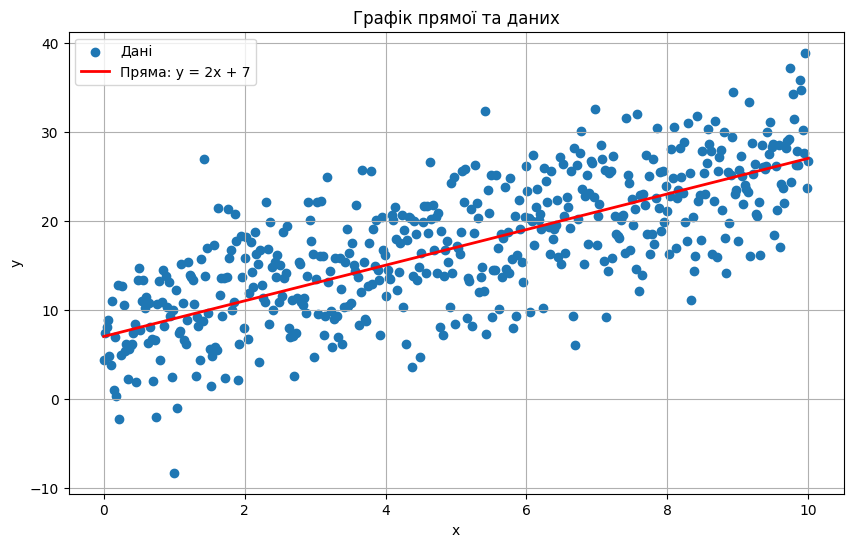

In [32]:
k = 2
b = 7

n = 500
x = np.linspace(0, 10, n)

noise = np.random.normal(0, 5, n)
y = k*x + b + noise

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік прямої та даних')
plt.legend()
plt.grid(True)
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [33]:
def least_squares(x, y):

    b1 = ((x*y).mean() - x.mean()*y.mean())/((x*x).mean() - (x.mean())**2)
    b0 = y.mean() - b1*x.mean()

    return b1, b0

ks, bs = least_squares(x, y)
print(f"Оригінальне k = {k}, b = {b}")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)

Оригінальне k = 2, b = 7
Отримане значення k:  1.9495399183231452
Отримане значення b:  7.490215361868559


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [34]:
kp, bp = np.polyfit(x,y,1)
print(f"Оригінальне k = {k}, b = {b}")
print("Значення отримані за допомогою np.polyfit(x,y,1):")
print("Отримане значення k: ", kp)
print("Отримане значення b: ", bp)
print()
kpx = abs(kp-k)
bpx = abs(bp-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", kpx)
print("Похибка значень b: ", bpx)
print()
print("Значення отримані за допомогою методу найменших квадратів:")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)
print()
ksx = abs(ks-k)
bsx = abs(bs-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", ksx)
print("Похибка значень b: ", bsx)

Оригінальне k = 2, b = 7
Значення отримані за допомогою np.polyfit(x,y,1):
Отримане значення k:  1.9495399183231428
Отримане значення b:  7.4902153618685725

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.05046008167685723
Похибка значень b:  0.4902153618685725

Значення отримані за допомогою методу найменших квадратів:
Отримане значення k:  1.9495399183231452
Отримане значення b:  7.490215361868559

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.050460081676854784
Похибка значень b:  0.4902153618685592


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

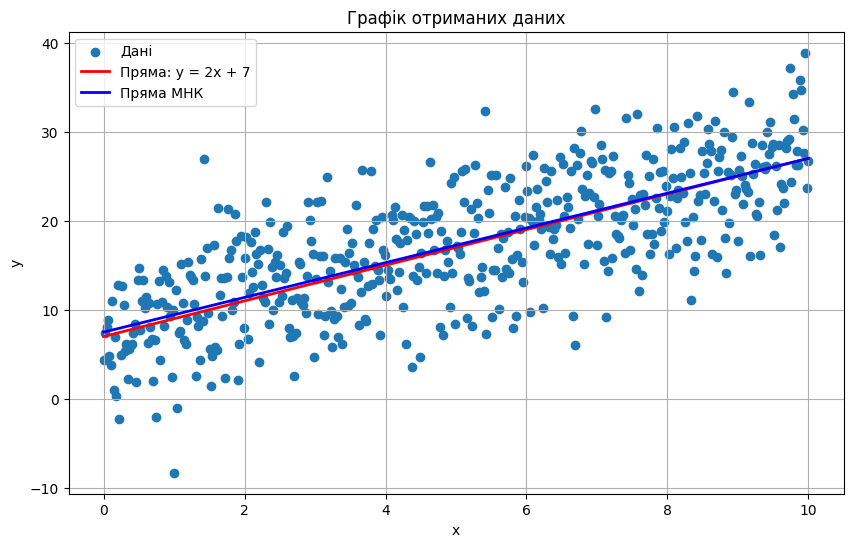

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.plot(x, ks * x + bs, color='blue', linestyle='-', linewidth=2, label='Пряма МНК')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік отриманих даних')
plt.legend()
plt.grid(True)
plt.show()

#### Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [36]:
Niter = 600 

learn_rate = 0.01

def gradient_descent(x, y, lr, Niter):
    kk = 0
    bb = 0
    
    for i in range(Niter):

        yi = bb + kk*x

        dk = (-2) * (x*(y - yi)).mean()
        db = (-2) * (y - yi).mean()

        kk = kk - lr * dk
        bb = bb - lr * db

    return kk, bb
    
kk, bb = gradient_descent(x, y, learn_rate, Niter)
print(kk, bb)

2.0051466488705403 7.1218593683202895


2. Додайте отриману лінію регресії на загальний графік

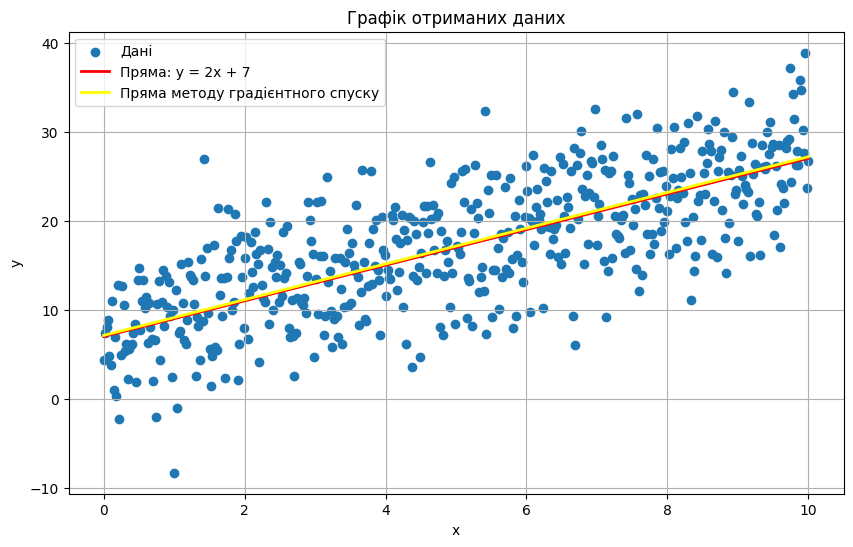

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.plot(x, kk * x + bb, color='yellow', linestyle='-', linewidth=2, label='Пряма методу градієнтного спуску')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік отриманих даних')
plt.legend()
plt.grid(True)
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

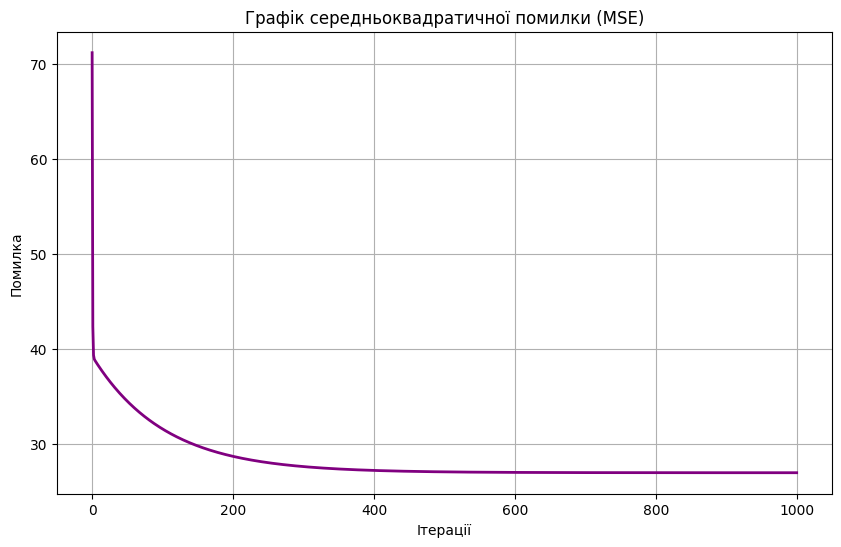

In [38]:
def E(x, y, kk, bb):
    yi = bb + kk*x
    return ((y - yi)**2).mean()

iter = 1000

def gradient_descent(x, y, lr, Niter):
    kk = 0
    bb = 0
    e = []
    for i in range(Niter):

        yi = bb + kk*x

        dk = (-2) * (x*(y - yi)).mean()
        db = (-2) * (y - yi).mean()


        kk = kk - lr * dk
        bb = bb - lr * db

        e.append(E(x, y, kk, bb))

    return kk, bb, e
    
err = gradient_descent(x, y, learn_rate, iter)[2]

plt.figure(figsize=(10, 6))
plt.plot(range(iter), err, color='purple', linestyle='-', linewidth=2)
plt.xlabel('Ітерації')
plt.ylabel('Помилка')
plt.title('Графік середньоквадратичної помилки (MSE)')
plt.grid(True)
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

In [39]:
print(f"Оригінальне k = {k}, b = {b}")

print("Значення отримані за допомогою  методу градієнтного спуску:")
print("Отримане значення k: ", kk)
print("Отримане значення b: ", bb)
print()
kkx = abs(kk-k)
bkx = abs(bb-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", kkx)
print("Похибка значень b: ", bkx)
print()

print("Значення отримані за допомогою методу найменших квадратів:")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)
print()

print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", ksx)
print("Похибка значень b: ", bsx)

Оригінальне k = 2, b = 7
Значення отримані за допомогою  методу градієнтного спуску:
Отримане значення k:  2.0051466488705403
Отримане значення b:  7.1218593683202895

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.005146648870540282
Похибка значень b:  0.12185936832028954

Значення отримані за допомогою методу найменших квадратів:
Отримане значення k:  1.9495399183231452
Отримане значення b:  7.490215361868559

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.050460081676854784
Похибка значень b:  0.4902153618685592
